<a href="https://colab.research.google.com/github/sandeep-selvaraj/nlp_sde/blob/main/READONLY_COPY_SDE_WS22_23_Excercise_9_Pytorch%2BWord_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. First Steps: Store this notebook!


Go to "File" and make sure you store this file as a local copy to your Google Drive. If you do not have a Google account and also do not want to create one, please check Option *B* below. 

Option A) Google Drive WITH collaboration

If you want to work in a collaborative manner where each of you in the group can see each other's contributions, one of you needs to store the notebook in Google Drive and share it with the others. You share it by clicking on the SHARE button on the top right of this page and share the link with the "everyone who receives this link can edit" option with the other team members per e-mail, skype, or any other way you prefer.

If you work with others, keep in mind to always copy the code before you edit it and always indicate your name as a comment (e.g. #Dagmar ) in the cell that it is clear who wrote which part. I also recommend creating a new code cell for your contributions.

Option B) Download this notebook as ipynb (Jupyter notebook) or py (Python file)

To run either of these on your local machine requires the installation of the required programs, which for the first tutorial are Python and NLTK. This will become more as we continue on to machine learning (requiring sklearn) and deep learning (requiring tensorflow and/or pytorch). In Google Codelab all of these are provided and do not need to be installed locally.

## License stuff
This excercise is based on the Semantic Computing Course by [Dagmar Grohmann](https://github.com/dgromann/SemComp_WS2018).



# 1: Pytorch Basic Data Structures

In order to get started with deep learning and practically code up neural networks, we need to familiarize ourselves with the packages that can be used to this end. There are two basic open source machine learning frameworks that can be used to this end: 

*   TensorFlow (Google)
*   Torch (Facebook, Google DeepMind, Twitter)

Since these are high level core libraries, it is easier to use a framework that builds on top of it and adds some usability and documentation. We are going to for once not use the Google solution, but will go with the Facebook solution of Pytorch. This first part of today's tutorial will introduce you to some core concepts of Pytorch before we start working with embeddings.





In [1]:
# Let's first install pytorch blabla
!pip3 install torch torchvision tqdm gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Tensors

Tensors are the main data structure used by PyTorch. They are quite similar to Numpy ndarrays, except that Tensors can run on the GPU. Tensors are used to encode the inputs and outputs of a neural network. 

There are many ways to initialize tensors.

In [ ]:
import numpy as np
import torch

x = torch.randn(3,3)
x

tensor([[-0.4699, -0.3743,  1.2208],
        [-1.5002, -1.3643, -0.0872],
        [ 1.5101,  0.9968,  1.1127]])

In [ ]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
x = torch.tensor(data)
x

In [ ]:
np_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x = torch.from_numpy(np_array)
x

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
x.shape

In [ ]:
x.dtype

In [ ]:
x.device

It is very easy to manipulate Tensors using mathematical operators.

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

In [ ]:
torch.add(x, y)

In [ ]:
x + y

In [ ]:
x.add(y)

In [ ]:
torch.mul(x, y)

Indexing works the same way as with Numpy.

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x

In [ ]:
x[0]

In [ ]:
x[0][0]

In [ ]:
x[1:]

Changing a tensor into a python data type using `.item()`

In [ ]:
x[0][0] # tensor

In [ ]:
x[0][0].item() # not a tensor anymore!

Let's visualize Tensors!

In [ ]:
data = [[[0,  1,  2,  3,  4],  [5,  6,  7,  8,  9]],
        [[10, 11, 12, 13, 14], [15, 16, 17, 18, 19]],
        [[20, 21, 22, 23, 24], [25, 26, 27, 28, 29]]]
x = torch.tensor(data)
x

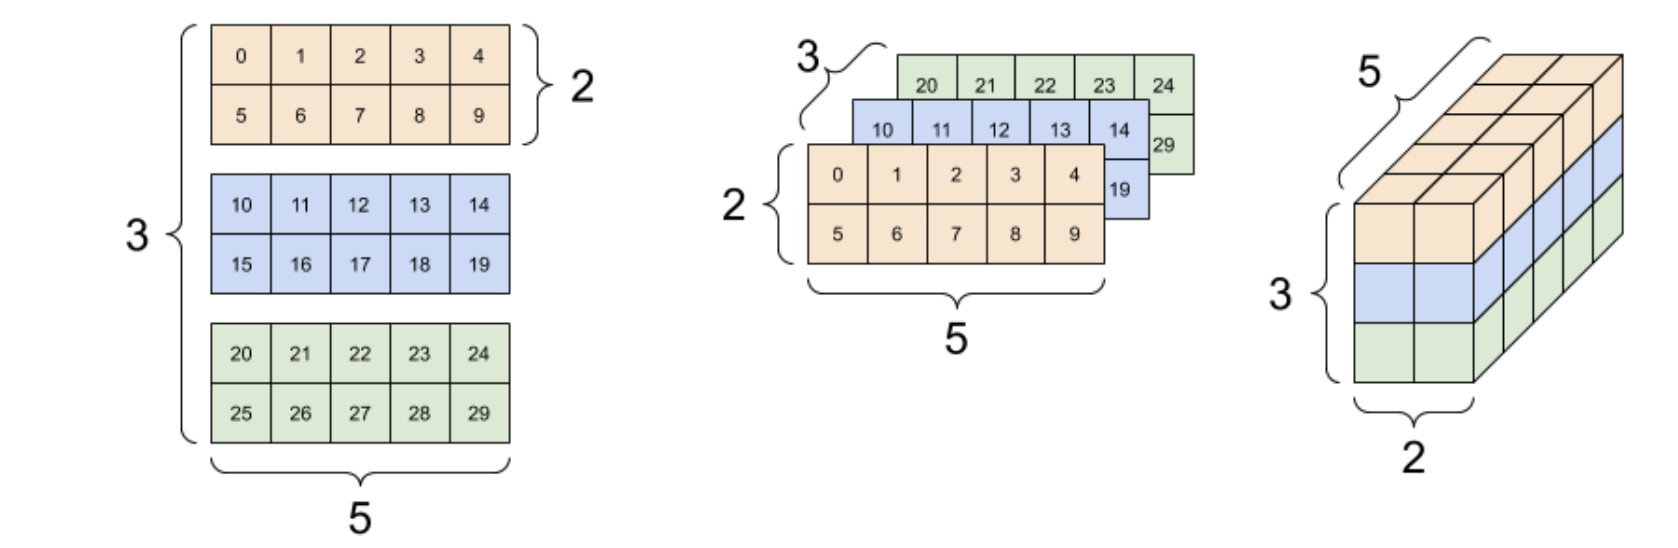

## 1 a)
Calculate the sum along the three different dimensions!

Reshape the 3D Tensor x into 3 different 2D Tensor by calculating this sum. The first one should have the shape (3, 5), the second one should have the shape (2, 5) and the third one should have the shape(3, 2). The dimensions are to be combined by addition.

Hint: Check the [documentation](https://pytorch.org/docs/stable/index.html)

## 1 b)

Create a Tensor consisting of ones with the shape (1, 2, 4, 5).

Add this Tensor with a random Tensor with the shape (10, 4).

Hint: Check the [documentation](https://pytorch.org/docs/stable/index.html)

# 2 PyTorch First Model
Neural networks obtain much of their power by combining linear and non-linear functions in clever ways. In this lesson, we will learn these core components, make up an objective function and see how to train a model.

## Why we use pytorch

**Gradients and Backpropagation**

If you set the flag  ```.requires_grad``` on a ```torch.Tensor``` to ```True``` the program will track all operations on it in order to enable later operations, such as backpropagation, which is very important to neural networks. 

When you finish all computations on your tensor, you can then simply call the function ```.backward()``` and have all the gradients computed automatically.. The gradient will then automatically be accumulated in the attribute ```.grad```. 

If you wish to disconnect a specific tensor from this process of tracking all operations, you can call the function ```.detach()```. This prevents future computations from being tracked. You can alternatively wrap the code block in a function ```with torch.no_grad()``` which does not track the operations on any variables included in the block. This is particularly helpful if you wish to evaluate a model that has trainable parameters with *required_grad=True* flags but for which we don't need the gradients in evaluation. 

There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a `.grad_fn` attribute that references a Function that has created the `Tensor` (except for Tensors created by the user - their grad_fn is None).

If you want to compute the derivatives, you can call `.backward() `on a `Tensor`. If `Tensor` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `gradient` argument that is a tensor of matching shape.



In [ ]:
# Tensor that requires gradient = operations are being tracked 
x = torch.ones(2, 2, requires_grad=True)
print(x)

# Let's do some operation 
y = x + 2 
print(y)

# y was created that has a grad_fn 
print(y.grad_fn)

# Some more operations 
z = y * y * 3

out = z.mean()

print(z, out)


# Gradients
# Let's calculate and print the gradietn (d(out)/dx) and print it
out.backward()
print(x.grad)

# Stop autograd from tracking 
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

 

## Base Model - Linear

The base class for all neural network modules is  ```torch.nn.Module``` and all of your models should be subclasses of 
this base class, e.g. ```torch.nn.Linear```generates a linear layer. Each module has a list of parameters (e.g. size of input features and size of output features) that are subclasses of the class ```torch.nn.Parameter```. 

Remember a simple linear NN connects the input and the hidden layer in the following way: 

> $F(x) = Wx + b$


In [ ]:
from torch import nn, optim

In [ ]:
# Initialize a linear model of shape 5 for input features and shape 3 
# for output features with a bias set to True per default
linear = nn.Linear(5, 3)
print(linear)

# Randomly initialize a tensor
data = torch.randn(2, 5)
print(data)

# Can we map data under A? That is, map from a five dimensional to a 3 dimensional space as defined above?
output = linear(data)
output

### 2 a)
What does `<AddmmBackward0>` mean? Make an educated guess!



1.   Add 0 to backward
2.   Matrix Multiplication Backwards
3.   Backward Step of the linear layer
4.   We use the Adam Optimizer



## First Small NN - Linear Layer

Remember a simple linear NN connects the input and the hidden layer in the following way: 

> $F(x) = Wx + b$

Here we use pytorch to train our first small neural network. We want the network to learn a given linear function $f: \mathbb{R} \to \mathbb{R}, f(x) = 3x + 2$. 

First, the training data:

In [ ]:
def generate_input(num):
  return torch.rand(num) * 20 # *20 is just for rescaling to have some nicer values and not just between 0 and 1

def to_learn(x):
  return 3*x + 2

sample_input = generate_input(4)
target = to_learn(sample_input)

sample_input, target

Define the neural network:

In [ ]:
class FirstModel(nn.Module):
  
  def __init__(self, in_dim, out_dim):
    super(FirstModel, self).__init__()
    self.linear = nn.Linear(in_dim, out_dim) # we only have one linear layer in our neural network!
  
  def forward(self, vec):
    return self.linear(vec)

Train the network!

In [ ]:
model = FirstModel(1, 1) 

      
loss_function = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.001) # Stochastic Gradient Descent as optimizer 


for step in range(10): # Try larger values 
    for vec in generate_input(4):
      # Let's clear the gradients before we start training since PyTorch accumulates them
      model.zero_grad()
      
      target = to_learn(vec)

      # This function gets the model output
      output = model(vec.view(1, 1)) # first dimension is batch size (here only one element of one dimension = (1,1))
      
      # This function calculates the loss using the loss function defined before
      loss = loss_function(output, target)

      print("Loss: ", loss.item())
      if loss.item() < 3: # just that the output is not so messy :)
        print('Weight:', model.linear.weight.item(), 'Bias:', model.linear.bias.item())
      
      
      loss.backward()
      optimizer.step()


# 3 Classification

Here, we train a second small model on classifying numbers. We learn about the softmax and a new loss function for classification.

## Convert scores in probabilities

Recall the softmax function: 

$$ \mathrm{softmax}(x_i)= \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [ ]:
import torch.nn.functional as F

In [ ]:
data = torch.randn(2, 5)
print(data)

# Put "data" through a softmax and explain the output
# Hint: for softmax you need to define a dimension by saying (data, dim=0)
# dimension specifies along which dimension softmax will be computed
data_columns = F.softmax(data, dim=0)


# EXERCISE: What happens if you change the dimensionality to 1? 
# What does the "dim" indiciation mean? 
data_rows = F.softmax(data, dim=1)

data_columns, data_rows

### 3 a)
What will the output of $\mathrm{softmax}((1, 2))$ be? Don't calculate, make an educated guess.

1. [0.41, 0.82]
2. [0.33, 0.67]
3. [e^1, e^2]
4. [0.27, 0.73]

## Negative Log Likelihood Loss

... is a loss function used for multi-class classification.

$$ L(x,y) = - x_y,$$
where x is the output of the model (log-probabilities) and y is the number of the correct class (not the class itself, but the position where the log-probability of the correct class should be in vector x)

In other words:
$$ L(p,y) = - log(p)_y $$ 

where p are the probabilies (after applying softmax on the scores) and y is the number of the correct class as before.

In [ ]:
scores = torch.Tensor([1,2,3]) # assume these are calculated by our model
probabilies = F.softmax(x, dim=0)
log_probabilies = F.log_softmax(x, dim=0)
probabilies, log_probabilies # log-probabilites are always negative!

We use the - because log-probabilites are always negative. This way the loss becomes positive. 

Now, imagine the correct class would have been class 0: Then the NLL-Loss would be large: 2.4076. The model was very confident that the predicted class should be class 2 (and hence, it gave class 2 a high probabilities = 66%)

--------
Keep in mind:
Large probability to the wrong class = small probability to the correct class = very small log-probability = high loss

In [ ]:
from torch._C import dtype
NLL_function = nn.NLLLoss()
correct_label = torch.LongTensor([0]) # you can change the correct class to 0, 1 or 2

NLL_function(log_probabilies.view((1,-1)), correct_label) # we need to reshape, because the first dim should be the batch size!

## Classification Neural Network

Here, we have a small example of a neural network for classification. We use only two classes and scalar input: $\mathrm{label}(x) = \begin{cases}
0, &  x < 0 \\
1, & \mathrm{otherwise}
\end{cases}$

In [ ]:
def generate_input(num):
  return torch.rand(num) * 10 - 5 # use data from -5 to +5

def get_label(x):
  if x < 0:
    label = 0
  else:
    label = 1
  return torch.LongTensor([label])

sample_input = generate_input(1)
sample_input, get_label(sample_input)

NameError: ignored

In [ ]:
class ClassificationModel(nn.Module):
  
  def __init__(self, vocab_size, num_labels):
    super(ClassificationModel, self).__init__()
    self.linear = nn.Linear(vocab_size, num_labels)
  
  def forward(self, vec):
    return F.log_softmax(self.linear(vec), dim=1)

In [ ]:
model = ClassificationModel(1, 2)  # one-dim input (scalar) and two output classes

      
loss_function = nn.NLLLoss() # NLLLoss() Negative Log Likelihood, aka multi-class cross-entropy 
optimizer = optim.SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent as optimizer 

losses = [] # keep track of the loss

for epoch in range(100): 
    batch_loss = 0
    for vec in generate_input(4):

      # Let's clear the gradients before we start training since PyTorch accumulates them
      model.zero_grad()
      
      target = get_label(vec)

      # This function gets the logit probabilities 
      log_probs = model(vec.view(1,-1))
      
      # This function calculates the loss 
      loss = loss_function(log_probs, target)
      
      print("Loss: ", loss.item())
      batch_loss += loss.item()
      loss.backward()
      optimizer.step()
    losses.append(batch_loss)




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = range(len(losses))

fig, ax = plt.subplots()
ax.plot(t, losses)

ax.set(xlabel='Training Steps', ylabel='Loss Values',
       title='See how the loss gets lower')
ax.grid()

plt.show()

# 4 Word Embeddings - first steps

We will start looking at Pytorch and then play with existing embeddings. 


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import tqdm

# Again random number generator to ensure reproducibility
torch.manual_seed(1)

Here is a mini-example of how to initialize the layer randomly and with only two words.

In [ ]:
# Map words to index to produce one-hot encodings 
word_to_ix = {"hello": 0, "world": 1}

# Initialize the embedding layer (nn = neural network) with the number of the 
# vocabulary and the dimensionality of the vectors 
# here: two words, vectors of 5 dimensions as ouput
embeds = nn.Embedding(2, 5) 
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long)

# Create a look up tensor for the random embeddings
# for key, index in word_to_ix.items(): 
embeddings = embeds(lookup_tensor)
print(embeddings)

In [ ]:
embeds(torch.tensor([1])) # same as the second vector above!

Let's train our first embeddings. What do SGD and lr mean in the code below? What happens if you increase lr and 
increase the number of iterations?

The below implementation is just a toy implementation. For a better version, see [this word2vec implementation in Pytorch](https://adoni.github.io/2017/11/08/word2vec-pytorch/)

## Simple Training language
We start by defining our own simple training language. Our language only contains words like "aaa", "bbb", "ccc" , … "xxx", "yyy", "zzz". The sentences contain words, whose charachters are close in alphabet. In the resulting word embedding the vectors of "aaa" should be closest to "bbb" and furthest away from "zzz".

In [ ]:
import string
from random import choice
def generate_simple_language_corpus(SENTENCE_NUMBER=500, SENTENCE_LENGTH=7):
  alpha_d = dict.fromkeys(string.ascii_lowercase, 0)

  vocab_dataset = {}
  for c, l in enumerate(alpha_d, 0):
      vocab_dataset[c] = l*3

  prev_word = None
  simple_language_text =""

  for s in range(SENTENCE_NUMBER):
      sentence = []
      start_word = choice(range(0, 18))
      for w in range(0, SENTENCE_LENGTH):
          i = choice([x for x in range(start_word+w+0, start_word+w+3) if x not in [prev_word]])
          sentence.append(vocab_dataset[i])
          prev_word = i
      simple_language_text += " ".join(sentence) + "\n"

  return simple_language_text

print(generate_simple_language_corpus(SENTENCE_NUMBER=10, SENTENCE_LENGTH=7))

## 4 a) Train Word Embeddings from our simple language - naive version
Now we are using the naive implementation to train Word Embeddings. Try to fill in the gaps "______" in the code below to solve this excercise.

In [ ]:
class NGramLanguageModeler(nn.Module):

      def __init__(self, vocab_size, embedding_dim, context_size, hidden_size):
          super(NGramLanguageModeler, self).__init__()
          self.embeddings = nn.Embedding(vocab_size, embedding_dim)
          self.linear1 = nn.Linear(___________, ___________)
          self.linear2 = nn.Linear(___________, ___________)

      def forward(self, inputs):
          embeds = self.embeddings(inputs).view((1, -1))
          out = F.relu(self.linear1(embeds))
          out = self.linear2(out)
          log_probs = F.log_softmax(out, dim=1)
          return log_probs

We have defined our neural network. Now, we want to train it. Below is the training loop as we have seen in the previous two examples. Fill in the missing code in the gaps!

In [ ]:
def train_word_embedding_model(training_corpus, EMBEDDING_DIM = 10, EPOCHS = 300, CONTEXT_SIZE = 2, HIDDEN_SIZE = 8):
  test_sentence = training_corpus.split()


  # we should tokenize the input, but we will ignore that for now
  # build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
  trigrams = [([test_sentence[i-1], test_sentence[i + 1]], test_sentence[i ])
              for i in range(1,len(test_sentence) - 1)]
  # print the first 3, just so you can see what they look like
  print(trigrams[:3])

  # deduplicate 
  vocab = set(test_sentence)

  # generate the word index
  word_to_ix = {word: i for i, word in enumerate(vocab)}


  losses = []
  loss_function = nn.NLLLoss()
  model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE, HIDDEN_SIZE)

  # Exercise: What do SGD and lr mean? What happenes if you change them?
  optimizer = optim.SGD(model.parameters(), lr=0.001)


  for epoch in tqdm.tqdm(range(EPOCHS),total=EPOCHS):
      total_loss = 0
      for context, target in trigrams:

          # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
          # into integer indices and wrap them in tensors)
          context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

          # Step 2. Recall that torch *accumulates* gradients. Before passing in a
          # new instance, you need to zero out the gradients from the old
          # instance
          __________

          # Step 3. Run the forward pass, getting log probabilities over next
          # words
          log_probs = model(context_idxs)

          # Step 4. Compute your loss function. (Again, Torch wants the target
          # word wrapped in a tensor)
          loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))

          # Step 5. Do the backward pass and update the gradient
          ___________
          ___________

          # Get the Python number from a 1-element Tensor by calling tensor.item()
          total_loss += loss.item()

      #print("\t", total_loss)
      losses.append(total_loss)
  print(losses) # The loss decreased every iteration over the training data!

  return model, word_to_ix, losses


training_corpus = generate_simple_language_corpus(SENTENCE_NUMBER=500, SENTENCE_LENGTH=7)
model, word_to_ix, losses = train_word_embedding_model(training_corpus, EMBEDDING_DIM=5, EPOCHS=10, CONTEXT_SIZE = 2)

## 4 b) Work with our Word-Embeddings
Now we are going to analyse how good our word embeddings were. For that we define first a function returning us the word embedding for a given word, and then a function sorting all word embeddings after their similarity to our target word.

Can you tweak the parameters from the word-embedding generation function to produce better results?

In [ ]:
def get_word_embedding_for_word(word_to_test, word_to_ix):
  word_to_test_ix = word_to_ix[word_to_test]
  word_to_test_torch = torch.tensor([word_to_test_ix], dtype=torch.long)
  
  embedding_of_word_to_test = model.embeddings(word_to_test_torch)
  return embedding_of_word_to_test

def most_similar(word_to_test, word_to_ix):
  test_embedding = get_word_embedding_for_word(word_to_test, word_to_ix)

  # get embeddings for all other possible words like aaa bbb ccc
  cos = torch.nn.CosineSimilarity()
  results = {}
  for c in string.ascii_lowercase:
    c_embedding = get_word_embedding_for_word(___________, word_to_ix)

    cosine_similarity = cos(___________, ___________)
    results[___________] = cosine_similarity.item()
  sorted_results =  dict(sorted(results.items(), key=lambda item: -item[1]))
  return sorted_results

sims = most_similar("eee", word_to_ix)

for k,v in sims.items():
  print("{}: {}".format(k,v))

## Better Implementation
We are using now our generated simple language and a much more optimized implementation of word-embeddings, the ones in the library [gensim](https://radimrehurek.com/gensim/).

Again we are displaying the most similar vectors. Can you notice a difference in performance to our naive implementation?

In [ ]:
import gensim 
from sklearn.decomposition import PCA 
from matplotlib import pyplot 

import warnings 
warnings.filterwarnings('ignore') 

training_corpus =  generate_simple_language_corpus(SENTENCE_NUMBER=3000, SENTENCE_LENGTH=7)

# we have to convert the corpus to a different form for gensim
training_corpus_gensim = [w.split(" ") for w in training_corpus.split("\n")]


model = gensim.models.Word2Vec(training_corpus_gensim, window=2) 

model.most_similar('ccc')

# 5: Use existing embeddings

Now we are using already pre-trained word embeddings.
The code below exemplifies how to load a trained embedding model in the gensim library. 

In [ ]:
# Let's first load a small subset of word2vec embeddings that have been trained on a 
# large corpus of news documents  
!wget https://github.com/dgromann/SemanticComputing/raw/master/tutorial6/word2vec_embeddings.bin
!wget https://raw.githubusercontent.com/dgromann/SemComp_WS2018/master/Tutorial6/analogy.txt


In [ ]:
import gensim
from sklearn.decomposition import PCA
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Let's load the model
model = gensim.models.KeyedVectors.load_word2vec_format("word2vec_embeddings.bin", binary=True)

# Print the length fo the whole vocabulary 
print(___________)

# Print the embedding of the  word  good
print(___________)

# Get the 10 most similar words of "good"
print(___________)

# Check whether our embeddings are good at the analogy task, what is the result to "?-man" when looking at "queen-king"?
print(___________)